Name - Damandeep Singh
       (Full Time)

question 1

Write a function to generate an m+1 dimensional data set, of size n, consisting of m continuous independent
variables (X) and one dependent variable (Y) defined as
yi = xiβ + e
where,
• e is a Gaussuan distribution with mean 0 and standard deviation (σ), representing the unexplained
variation in Y
• β is a random vector of dimensionality m + 1, representing the coefficients of the linear relationship
between X and Y, and
• ∀i ∈ [1, n], xi0 = 1
The function should take the following parameters:
• σ: The spread of noise in the output variable
• n: The size of the data set
• m: The number of indepedent variables
Output from the function should be:
• X: An n × m numpy array of independent variable values (with a 1 in the first column)
• Y : The n × 1 numpy array of output values
• β: The random coefficients used to generatre Y from X

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_data(sigma,n,m):
  # for generating value of X
  x_ones=np.ones((n,1))       #for generating ones in the first column 
  x_rand=np.random.randn(n,m)   #for generating random number
  X=np.concatenate((x_ones,x_rand),axis=1)      # concatenating ones and random number 

  #generating beta 
  beta=np.random.randn(m+1,1)

  #generating e
  e=np.random.normal(0,sigma,(n,1))

  #generating value of Y
  Y=np.dot(X,beta) + e

  return X,Y,beta

X,Y,beta=generate_data(0.1,100000,3)


question 2

Write a function that learns the parameters of a linear regression line given inputs
• X: An n × m numpy array of independent variable values
• Y : The n × 1 numpy array of output values
• k: the number of iteractions (epochs)
• τ : the threshold on change in Cost function value from the previous to current iteration
The function should implement the Gradient Descent algorithm as discussed in class that initialises β with
random values and then updates these values in each iteraction by moving in the the direction defined by
the partial derivative of the cost function with respect to each of the coefficients. The function should use
only one loop that ends after a number of iterations (k) or a threshold on the change in cost function value
(τ ).
The output should be an m + 1 dimensional vector of coefficients and the final cost function value.

In [ ]:
def linear_regression(X,Y,k,t):
  beta= np.random.randn(X.shape[1],1)
  m=X.shape[1]
  cost_prev=np.inf
  alpha=0.1    #learning rate 
  for epoches in range(k):

    #forward pass 
    y_hat=np.matmul(X,beta)
    
    # mean squared error 
    loss=y_hat-Y       #predicted value - actual value 
    loss_transpose=(y_hat-Y).T
    cost_fun = np.dot(loss_transpose,loss)/(2*(X.shape[0]))


    if abs(cost_fun-cost_prev)<t:    #thresold value
            break
    cost_prev=cost_fun
    
    #backward pass 
    gradient = np.dot(X.T,(y_hat - Y))/(X.shape[0])                #dL/dw
    beta = beta - alpha*gradient 
  return beta,cost_fun[0][0]
  
linear_regression(X,Y,1000,0.005)

(array([[ 0.0292152 ],
        [-1.06254811],
        [ 0.94695805],
        [ 0.68585369]]), 0.022590888864952863)

Question 3

Create a report investigating how differen values of n and σ impact the ability for your linear regression
function to learn the coefficients, β, used to generate the output vector Y .

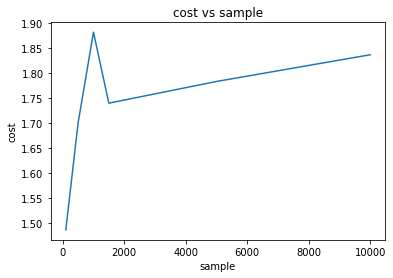

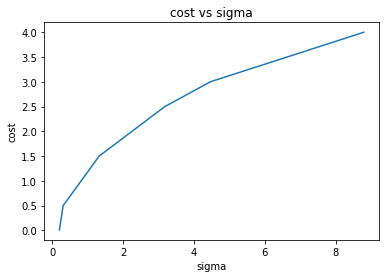

In [ ]:
n=[100,500,1000,1500,5000,10000]    #different sample values 
sigma=[0.01,0.5,1.5,2.5,3,4]         #different sigma values 


#plot 1
cost=[]
for i in n:
  X,Y,beta=generate_data(1.8,i,5)
  new_beta,cost_=linear_regression(X,Y,1000,0.05)
  cost.append(cost_)

plt.xlabel("sample")
plt.ylabel('cost')
plt.title('cost vs sample')
plt.plot(n,cost)
plt.show()
plt.close()


#plot 2
cost=[]
for i in sigma:
  X,Y,beta=generate_data(i,1000,5)
  new_beta,cost_=linear_regression(X,Y,1000,0.05)
  cost.append(cost_)

plt.xlabel("sigma")
plt.ylabel('cost')
plt.title('cost vs sigma')
plt.plot(cost,sigma)
plt.show()
plt.close()


